In [185]:
import pandas as pd
import numpy as np

In [186]:
df = pd.read_csv('SBAnational.csv', low_memory=False)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [212]:
# Columns
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [187]:
# Shape
df.shape

(899164, 27)

In [188]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [189]:
# Nulls
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [190]:
# RevLineCr unique
df['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [191]:
# RevLineCr value_counts
df['RevLineCr'].value_counts()

RevLineCr
N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64

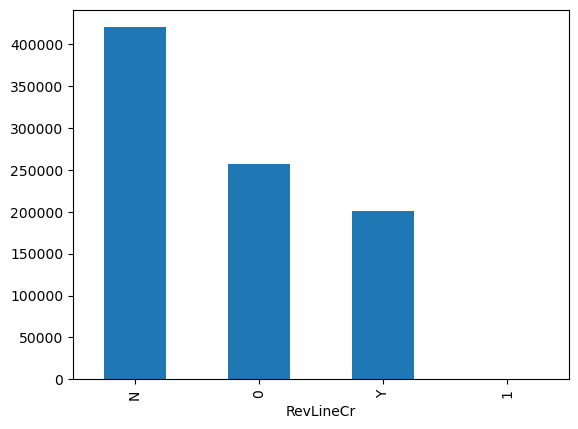

In [192]:
# Visualization to validate
import matplotlib.pyplot as plt

# Plot frequency distributions
filtered_df['RevLineCr'].value_counts().plot(kind='bar')
plt.show()

In [193]:
df = pd.DataFrame(df)

# Mapping and cleaning
mapping = {
    "N": 0, "0": 0,
    "Y": 1, "1": 1,
    "T": None, "R": None, "`": None,
    "2": None, "C": None, "3": None,
    ",": None, "7": None, "A": None,
    "5": None, ".": None, "4": None,
    "-": None, "Q": None
}

df["RevLineCr"] = df["RevLineCr"].map(mapping)

# Handle missing values (e.g., drop or impute)
df = df.dropna()  # Drop rows with None values

# Convert to numeric
df["RevLineCr"] = df["RevLineCr"].astype(int)

# Print
print(df["RevLineCr"].value_counts())

RevLineCr
0    101994
1     52088
Name: count, dtype: int64


In [194]:
# LowDoc unique
df['LowDoc'].unique()

array(['N', 'Y', 'C', 'S', 'R', 'A', '0'], dtype=object)

In [195]:
# LowDoc value_counts
df['LowDoc'].value_counts()

LowDoc
N    143438
Y     10063
S       280
A       158
C        75
0        44
R        24
Name: count, dtype: int64

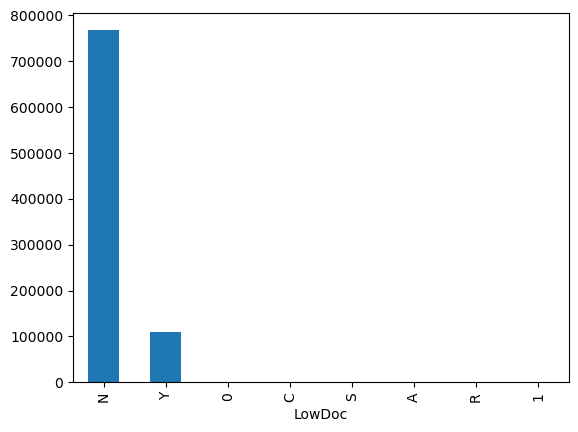

In [196]:
# Visualization to validate
import matplotlib.pyplot as plt

# Plot frequency distributions
filtered_df['LowDoc'].value_counts().plot(kind='bar')
plt.show()

In [197]:
# Filter out mixed values and 
df = pd.DataFrame(df)

# Mapping and cleaning
mapping = {
    "N": 0, "0": 0,
    "Y": 1, "1": 1,
    "C": None, "S": None, "A": None,
    "R": None
}

df["LowDoc"] = df["LowDoc"].map(mapping)

# Handle missing values (e.g., drop or impute)
df = df.dropna()  # Drop rows with None values

# Convert to numeric
df["LowDoc"] = df["LowDoc"].astype(int)

# Print
print(df["LowDoc"].value_counts())

LowDoc
0    143482
1     10063
Name: count, dtype: int64
